# 探索变量间的关系
比统计更直观呢~

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
tips = sns.load_dataset("tips")

In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips[tips['size']==1]

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
82,10.07,1.83,Female,No,Thur,Lunch,1
111,7.25,1.00,Female,No,Sat,Dinner,1
222,8.58,1.92,Male,Yes,Fri,Lunch,1


## 绘制线性回归模型
最简单的方式：散点图 + 线性回归 + 95%置信区间

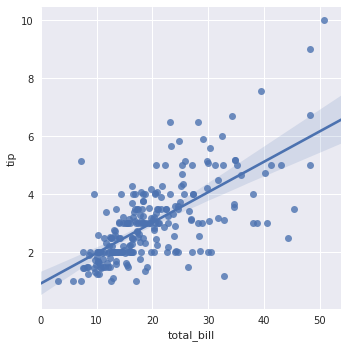

In [3]:
sns.lmplot(x="total_bill", y="tip", data=tips)

对于变量离线取值，散点图就显得有些尴尬了。。。

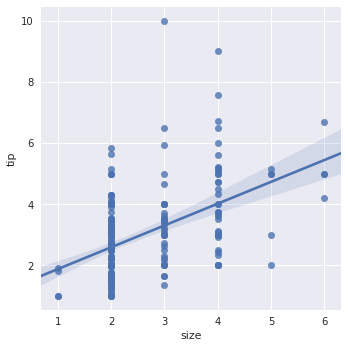

In [5]:
sns.lmplot(x="size", y="tip", data=tips)

方法1：加个小的抖动

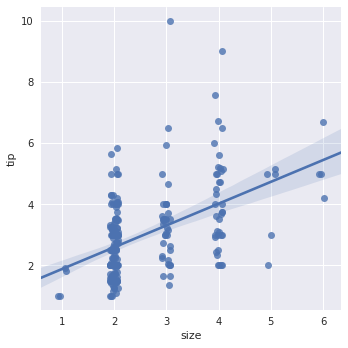

In [9]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.08)

方法2：离散取值上用均值和置信区间代替散点

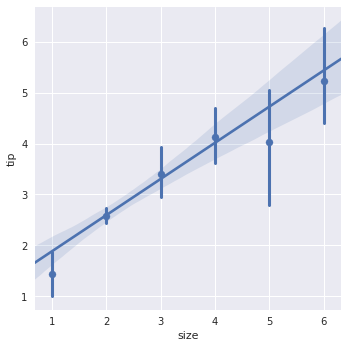

In [4]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean,ci=95)

## 拟合不同模型
有些时候线性拟合效果不错，有些时候差强人意~

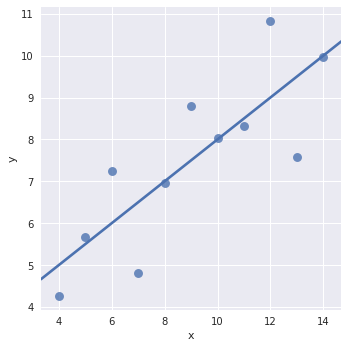

In [10]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), ci=None, scatter_kws={"s": 80})

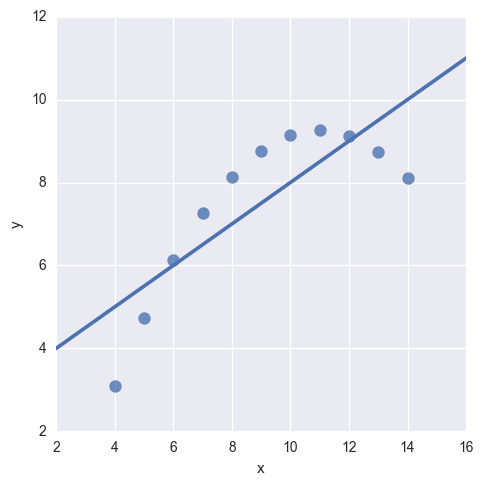

In [18]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), ci=None, scatter_kws={"s": 80})

试试高阶拟合~

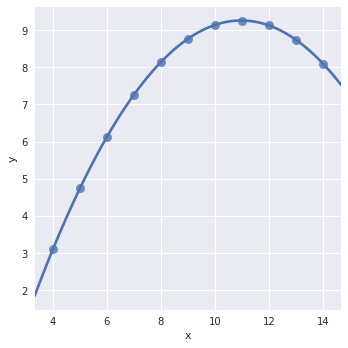

In [13]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=2, ci=None, scatter_kws={"s": 80})

异常值肿么办？

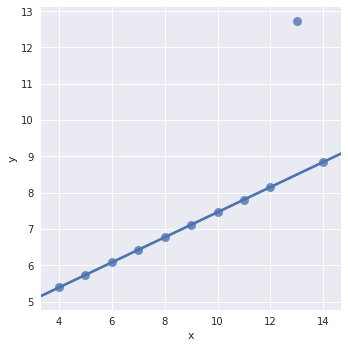

In [16]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), robust=True, ci=None, scatter_kws={"s": 80})

二值变量如何拟合？

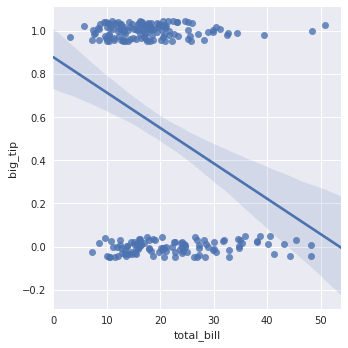

In [19]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips, y_jitter=.05)

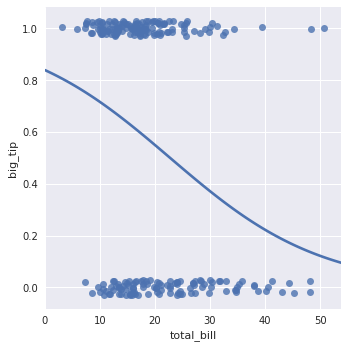

In [21]:
sns.lmplot(x="total_bill", y="big_tip", data=tips, logistic=True, y_jitter=.03, ci=None)

如何评价拟合效果？残差曲线~

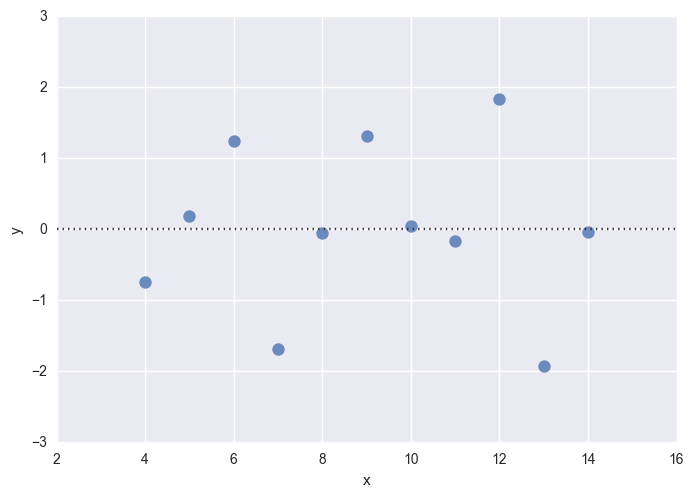

In [24]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), scatter_kws={"s": 80})

拟合的好，就是白噪声的分布$N(0,\sigma^2)$
拟合的差，就能看出一些模式

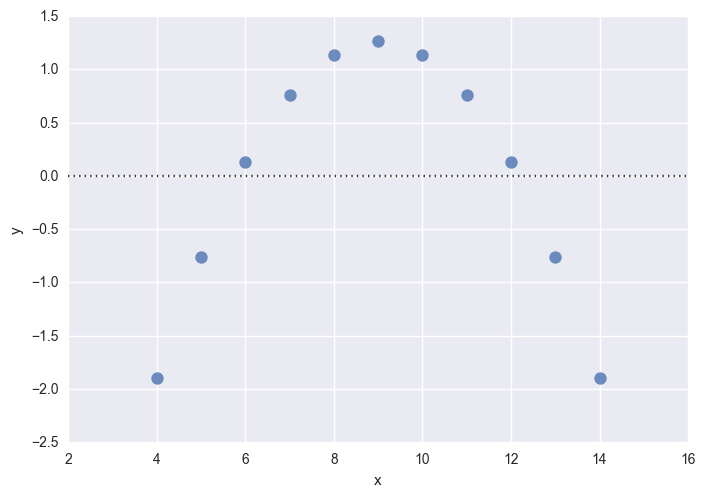

In [25]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), scatter_kws={"s": 80})

## 变量间的条件关系摸索

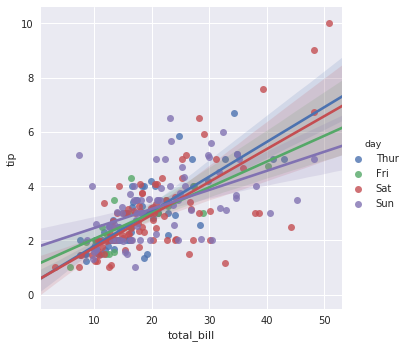

In [7]:
sns.lmplot(x="total_bill", y="tip", hue="day", data=tips)

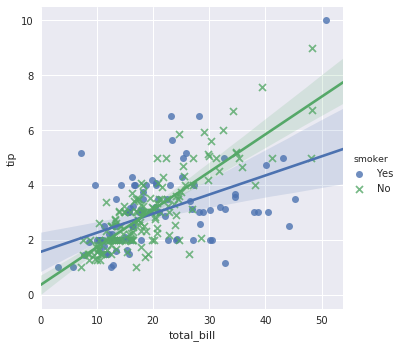

In [22]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o", "x"])

尝试增加更多的分类条件

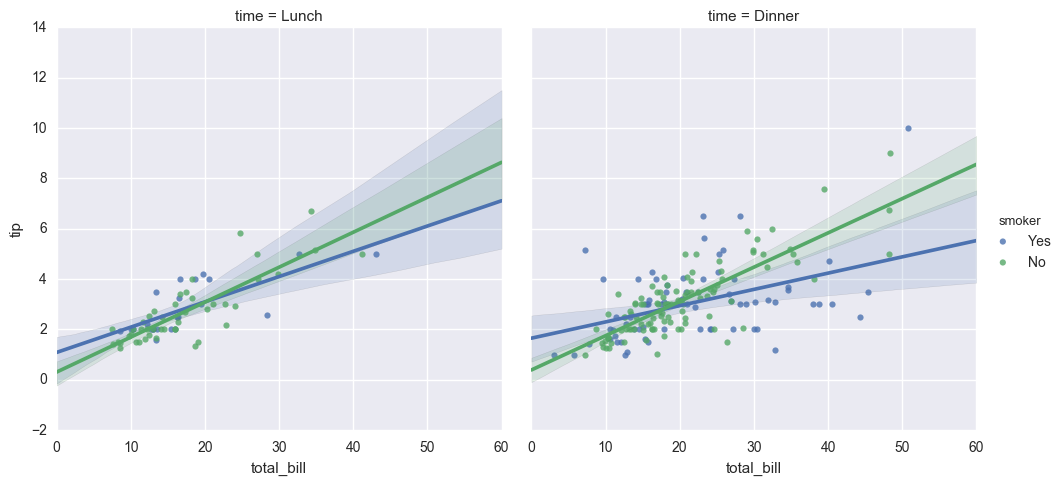

In [28]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

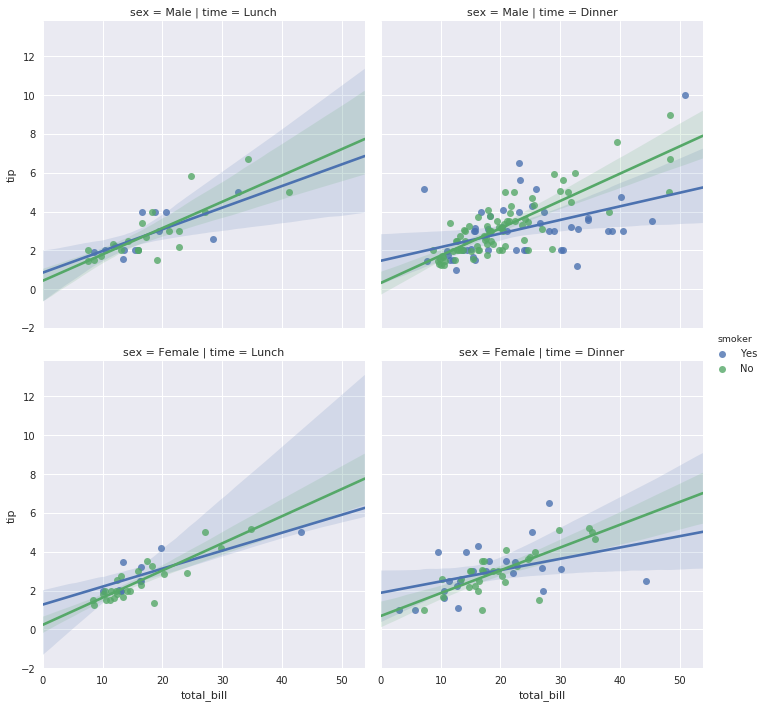

In [23]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", row="sex", data=tips)

## 控制图片的大小和形状

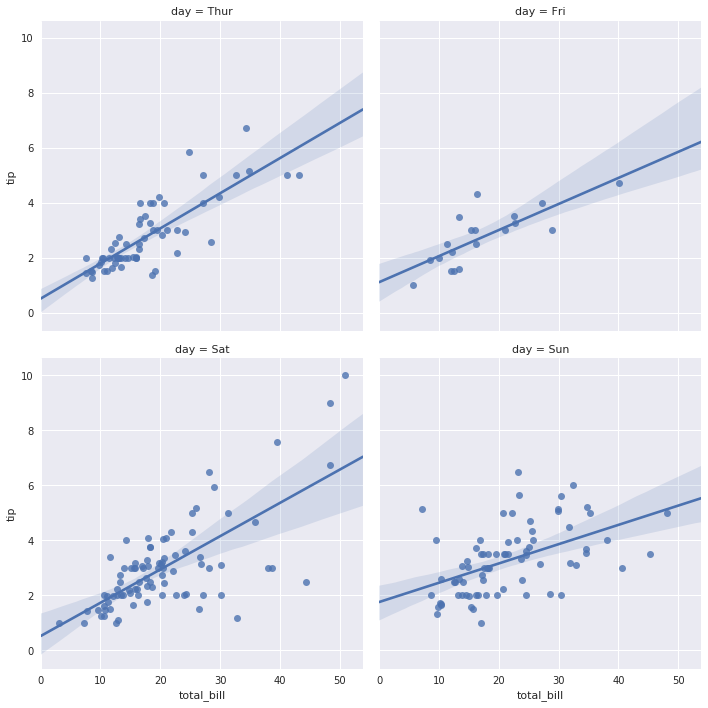

In [25]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips, col_wrap=2, size=5)

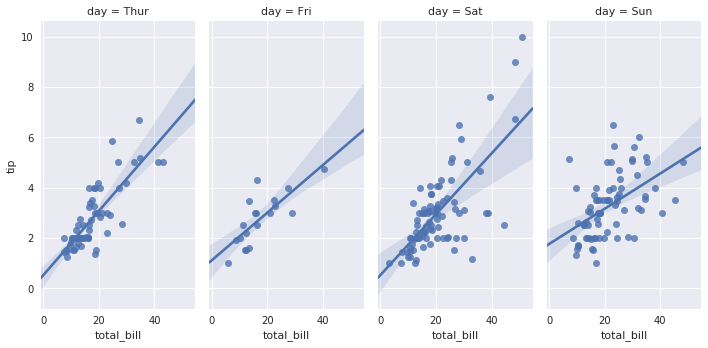

In [8]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips, aspect=0.5)